In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('UScomments.csv',error_bad_lines=False)  
#ignore bad lines without showing any error.
                                                         

C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2787088731.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('UScomments.csv',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\HP\AppData\Local\Temp\ipykernel_17404\2787088731.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv',error_bad_lines=False)


In [3]:
df.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
## lets find out missing values in your data
df.isnull().sum()


video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#We have 25 missing values. hence we will drop missing values.
## drop missing values as we have very few & update datafraem as well..

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# 1. Sentimental Analysis.

In [8]:
### lets perform sentiment analysis using TextBlob which is 
##a NLP library built on top of NLTK )..

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [11]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [13]:
comments = df[0:10000]

In [14]:
polarity=[]
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [16]:
df['polarity']=polarity

In [17]:
df.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

In [18]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [19]:
df.shape

(691375, 5)

# 2. Generating a Wordcloud.


In [20]:
df_positive = df[df['polarity'] ==1]

In [21]:
df_negetive = df[df['polarity'] ==-1]

In [22]:
df_negetive.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  polarity  
512       0      -1.0  
562       0      -1.0

In [23]:
df_positive.head(2)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   

    replies  polarity  
64        0       1.0  
156       0       1.0

In [24]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud , STOPWORDS

In [26]:
df_negetive['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [27]:
total_n_comments = ' '.join(df_negetive['comment_text'])

In [28]:
total_n_comments[0:200]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?"

(-0.5, 399.5, 199.5, -0.5)

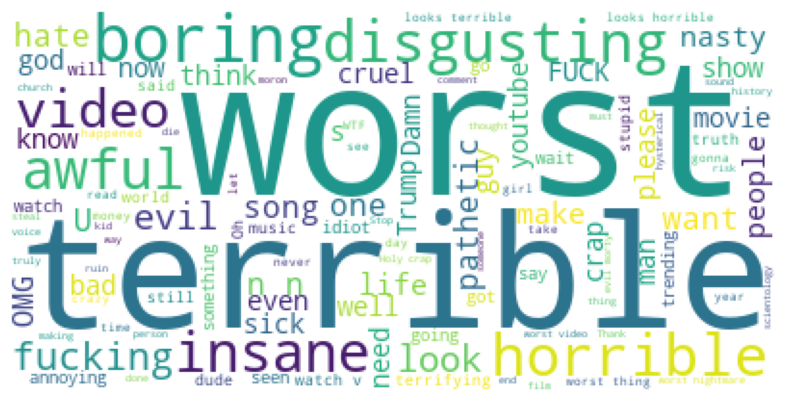

In [33]:
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color='white').generate(total_n_comments)
plt.figure(figsize=(30,5))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
total_p_comments = ' '.join(df_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

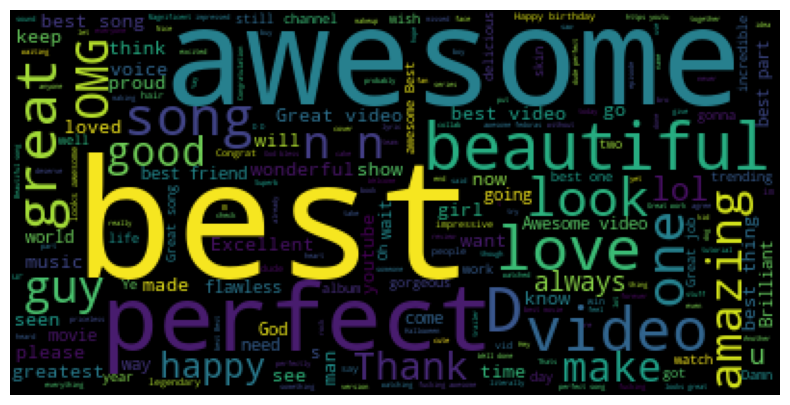

In [34]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_p_comments)
plt.figure(figsize=(30,5))
plt.imshow(wordcloud)
plt.axis('off')

# 3. Emoji Analysis

In [77]:
!pip install emoji==1.7.0

     -------------------------------------- 175.4/175.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=9b60efb4c9bdf56708439de83785c13f0e6d932eba5c69a7afafd0a247b1550b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.0.0
    Uninstalling emoji-2.0.0:
      Successfully uninstalled emoji-2.0.0


In [78]:
import emoji

In [79]:
df.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

In [80]:
comment1 = 'trending 😉'

In [81]:
comment1

'trending 😉'

In [83]:
[c for c in comment1 if c in emoji.EMOJI_DATA]

['😉']

In [86]:
emoji_list = []
for comment1 in df['comment_text']:
    for char in comment1:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [87]:
len(emoji_list)

294549

In [89]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [90]:
### NOw we have to compute frequencies of each & every emojis..

In [94]:
from collections import Counter

In [95]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [97]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [100]:
Counter(emoji_list).most_common(10)[1][0]

'😍'

In [107]:
emojis= [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

storing of emojis 

In [108]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

# storing of frequncies

In [111]:
freq= [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [113]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [114]:
!pip install plotly

In [115]:
import plotly.graph_objs as go

In [116]:
from plotly.offline import iplot

In [119]:
trace = go.Bar(x=emojis,y=freq)

In [120]:
iplot([trace])

In [122]:
df.describe()

polarity
count  691375.000000
mean        0.137812
std         0.342138
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.342130
max         1.000000

In [123]:
Counter(' '.join(emoji_list))

Counter({'‼': 211,
         ' ': 294548,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
  

# 4. collecting data from youtube

In [124]:
import os

In [125]:
path = r'D:\Data Analytics\Data Analysis\additional_data'

In [127]:
files = os.listdir(path)

In [128]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [133]:
files_csv = [files[i] for i in range(0,len(files),2)]
    

In [134]:
files_csv


['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [142]:
files_csv[0].split('.')[0][0:2]

'CA'

In [145]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines= False)
    
    current_df['country'] = file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\HP\AppData\Local\Temp\ipykernel_17404\4004712220.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\HP\AppData\Local\Temp\ipykernel_17404\4004712220.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\HP\AppData\Local\Temp\ipykernel_17404\4004712220.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\HP\AppData\Local\Temp\ipykernel_17404\4004712220.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\HP\AppData\Local\Temp\ipykernel_17404\4004712220.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad

In [144]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA

In [147]:
full_df.shape

(375942, 17)

# 5. which category has maximum likes.

In [188]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [206]:
cat=pd.read_csv('category_file.txt', sep=':')

In [207]:
cat

Category_id      Category_name
1            \t\tFilm & Animation
2            \t\tAutos & Vehicles
10                      \t\tMusic
15             \t\tPets & Animals
17                     \t\tSports
18               \t\tShort Movies
19            \t\tTravel & Events
20                     \t\tGaming
21              \t\tVideoblogging
22             \t\tPeople & Blogs
23                     \t\tComedy
24              \t\tEntertainment
25            \t\tNews & Politics
26              \t\tHowto & Style
27                  \t\tEducation
28       \t\tScience & Technology
29      \t\tNonprofits & Activism
30                     \t\tMovies
31            \t\tAnime/Animation
32           \t\tAction/Adventure
33                   \t\tClassics
34                     \t\tComedy
35                \t\tDocumentary
36                      \t\tDrama
37                     \t\tFamily
38                    \t\tForeign
39                     \t\tHorror
40             \t\tSci-Fi/Fantasy
41                   \t\tThriller
42                     \t\tShorts
43                      \t\tShows
44       \t\tTrailers

In [208]:
cat.reset_index(inplace=True)

In [209]:
cat.columns=['category_id','Category_name']

In [210]:
cat.set_index('category_id',inplace=True)

In [211]:
cat

Category_name
category_id                            
1                  \t\tFilm & Animation
2                  \t\tAutos & Vehicles
10                            \t\tMusic
15                   \t\tPets & Animals
17                           \t\tSports
18                     \t\tShort Movies
19                  \t\tTravel & Events
20                           \t\tGaming
21                    \t\tVideoblogging
22                   \t\tPeople & Blogs
23                           \t\tComedy
24                    \t\tEntertainment
25                  \t\tNews & Politics
26                    \t\tHowto & Style
27                        \t\tEducation
28             \t\tScience & Technology
29            \t\tNonprofits & Activism
30                           \t\tMovies
31                  \t\tAnime/Animation
32                 \t\tAction/Adventure
33                         \t\tClassics
34                           \t\tComedy
35                      \t\tDocumentary
36                            \t\tDrama
37                           \t\tFamily
38                          \t\tForeign
39                           \t\tHorror
40                   \t\tSci-Fi/Fantasy
41                         \t\tThriller
42                           \t\tShorts
43                            \t\tShows
44             \t\tTrailers

In [212]:
cat.to_dict()

{'Category_name': {1: ' \t\tFilm & Animation',
  2: ' \t\tAutos & Vehicles',
  10: ' \t\tMusic',
  15: ' \t\tPets & Animals',
  17: ' \t\tSports',
  18: ' \t\tShort Movies',
  19: ' \t\tTravel & Events',
  20: ' \t\tGaming',
  21: ' \t\tVideoblogging',
  22: ' \t\tPeople & Blogs',
  23: ' \t\tComedy',
  24: ' \t\tEntertainment',
  25: ' \t\tNews & Politics',
  26: ' \t\tHowto & Style',
  27: ' \t\tEducation',
  28: ' \t\tScience & Technology',
  29: ' \t\tNonprofits & Activism',
  30: ' \t\tMovies',
  31: ' \t\tAnime/Animation',
  32: ' \t\tAction/Adventure',
  33: ' \t\tClassics',
  34: ' \t\tComedy',
  35: ' \t\tDocumentary',
  36: ' \t\tDrama',
  37: ' \t\tFamily',
  38: ' \t\tForeign',
  39: ' \t\tHorror',
  40: ' \t\tSci-Fi/Fantasy',
  41: ' \t\tThriller',
  42: ' \t\tShorts',
  43: ' \t\tShows',
  44: ' \t\tTrailers            '}}

In [218]:
dct=cat.to_dict()

In [219]:
dct['Category_name']

{1: ' \t\tFilm & Animation',
 2: ' \t\tAutos & Vehicles',
 10: ' \t\tMusic',
 15: ' \t\tPets & Animals',
 17: ' \t\tSports',
 18: ' \t\tShort Movies',
 19: ' \t\tTravel & Events',
 20: ' \t\tGaming',
 21: ' \t\tVideoblogging',
 22: ' \t\tPeople & Blogs',
 23: ' \t\tComedy',
 24: ' \t\tEntertainment',
 25: ' \t\tNews & Politics',
 26: ' \t\tHowto & Style',
 27: ' \t\tEducation',
 28: ' \t\tScience & Technology',
 29: ' \t\tNonprofits & Activism',
 30: ' \t\tMovies',
 31: ' \t\tAnime/Animation',
 32: ' \t\tAction/Adventure',
 33: ' \t\tClassics',
 34: ' \t\tComedy',
 35: ' \t\tDocumentary',
 36: ' \t\tDrama',
 37: ' \t\tFamily',
 38: ' \t\tForeign',
 39: ' \t\tHorror',
 40: ' \t\tSci-Fi/Fantasy',
 41: ' \t\tThriller',
 42: ' \t\tShorts',
 43: ' \t\tShows',
 44: ' \t\tTrailers            '}

In [220]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [221]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [222]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   

        category_name  
0           \t\tMusic  
1          \t\tComedy  
2          \t\tComedy  
3   \t\tEntertainment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' \t\tMusic'),
  Text(1, 0, ' \t\tComedy'),
  Text(2, 0, ' \t\tEntertainment'),
  Text(3, 0, ' \t\tNews & Politics'),
  Text(4, 0, ' \t\tPeople & Blogs'),
  Text(5, 0, ' \t\tHowto & Style'),
  Text(6, 0, ' \t\tFilm & Animation'),
  Text(7, 0, ' \t\tScience & Technology'),
  Text(8, 0, ' \t\tGaming'),
  Text(9, 0, ' \t\tSports'),
  Text(10, 0, ' \t\tNonprofits & Activism'),
  Text(11, 0, ' \t\tPets & Animals'),
  Text(12, 0, ' \t\tTravel & Events'),
  Text(13, 0, ' \t\tAutos & Vehicles'),
  Text(14, 0, ' \t\tEducation'),
  Text(15, 0, ' \t\tShows'),
  Text(16, 0, ' \t\tMovies'),
  Text(17, 0, ' \t\tTrailers            ')])

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



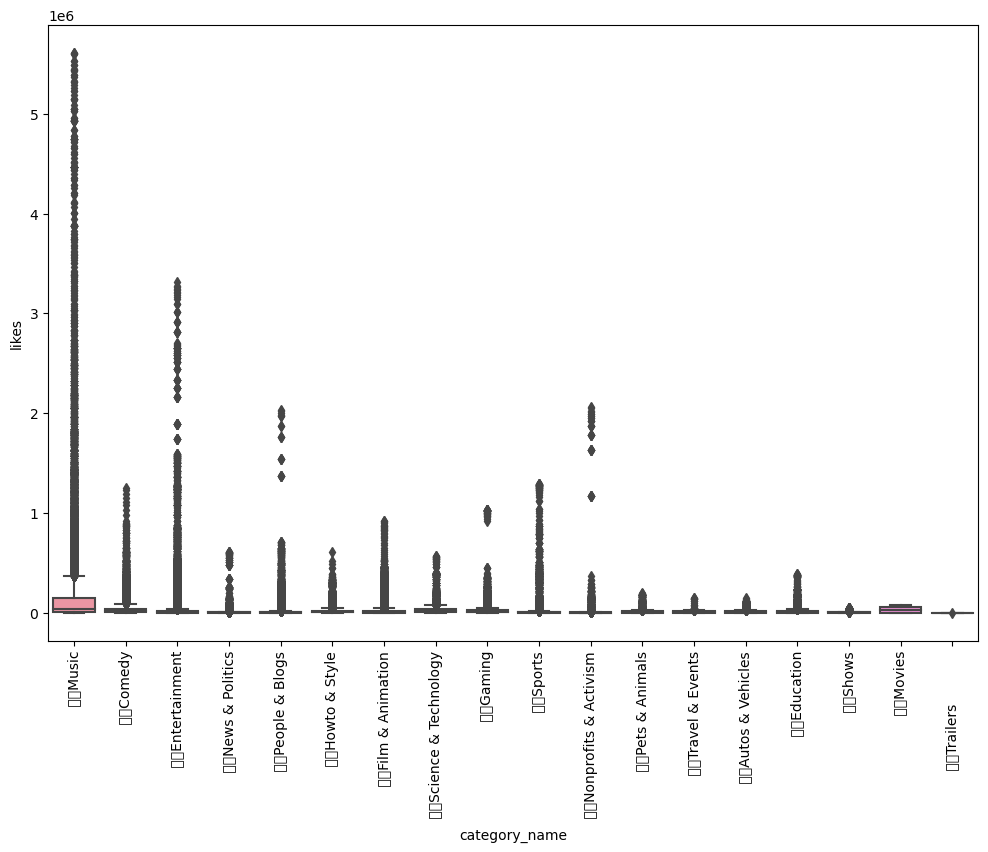

In [224]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

# 6. engagement of audience

In [225]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [227]:
full_df['likes_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislikes_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_rate']=(full_df['comment_count']/full_df['views'])*100

In [228]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   

                                         description country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   

        category_name likes_rate  dislikes_rate  comment_rate  
0           \t\tMusic   4.589104       0.253051      0.733639  
1          \t\tComedy  12.594873       0.166363      1.284185  
2          \t\tComedy   4.575843       0.167292      0.256342  
3   \t\tEntertainment   6.309630       0.094903      0.835851  

[4 rows x 21 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' \t\tMusic'),
  Text(1, 0, ' \t\tComedy'),
  Text(2, 0, ' \t\tEntertainment'),
  Text(3, 0, ' \t\tNews & Politics'),
  Text(4, 0, ' \t\tPeople & Blogs'),
  Text(5, 0, ' \t\tHowto & Style'),
  Text(6, 0, ' \t\tFilm & Animation'),
  Text(7, 0, ' \t\tScience & Technology'),
  Text(8, 0, ' \t\tGaming'),
  Text(9, 0, ' \t\tSports'),
  Text(10, 0, ' \t\tNonprofits & Activism'),
  Text(11, 0, ' \t\tPets & Animals'),
  Text(12, 0, ' \t\tTravel & Events'),
  Text(13, 0, ' \t\tAutos & Vehicles'),
  Text(14, 0, ' \t\tEducation'),
  Text(15, 0, ' \t\tShows'),
  Text(16, 0, ' \t\tMovies'),
  Text(17, 0, ' \t\tTrailers            ')])

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



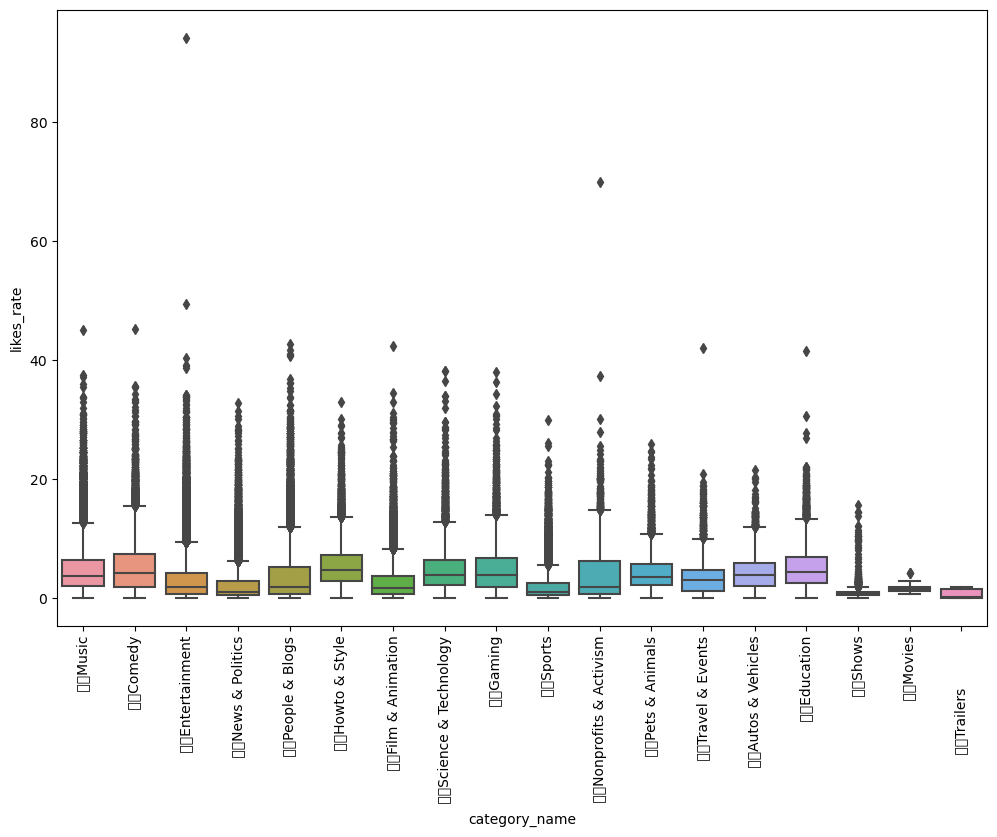

In [229]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes_rate',data=full_df)
plt.xticks(rotation='vertical')

In [230]:
### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

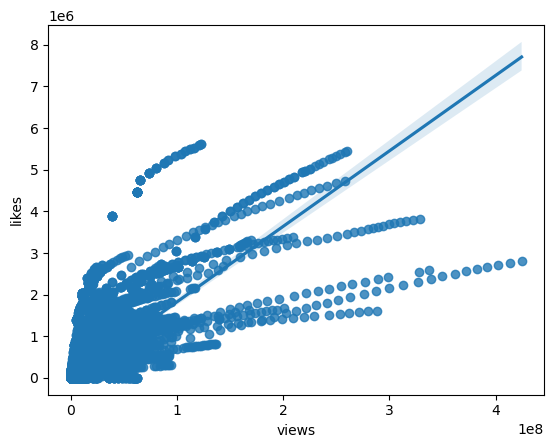

In [231]:
sns.regplot(data=full_df,x='views', y='likes')

In [236]:
full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

In [232]:
### finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

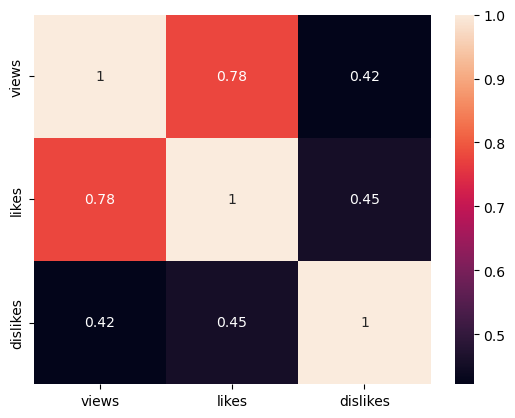

In [233]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)

In [234]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   

                                         description country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   

        category_name likes_rate  dislikes_rate  comment_rate  
0           \t\tMusic   4.589104       0.253051      0.733639  
1          \t\tComedy  12.594873       0.166363      1.284185  
2          \t\tComedy   4.575843       0.167292      0.256342  
3   \t\tEntertainment   6.309630       0.094903      0.835851  

[4 rows x 21 columns]

# 7..Which channels have the largest number of trending videos?

In [237]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   
3             False             False                   False   

                                         description country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA   
1  STill got a lot of packages. Probably will las...      CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA   
3  I know it's been a while since we did this sho...      CA   

        category_name likes_rate  dislikes_rate  comment_rate  
0           \t\tMusic   4.589104       0.253051      0.733639  
1          \t\tComedy  12.594873       0.166363      1.284185  
2          \t\tComedy   4.575843       0.167292      0.256342  
3   \t\tEntertainment   6.309630       0.094903      0.835851  

[4 rows x 21 columns]

In [243]:
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [244]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [246]:
import plotly.express as px

In [248]:
px.bar(data_frame = cdf[0:20],x='channel_title', y='total_videos')

# 8. Does punctuations in titles and tags have a relation with views , likes , dislikes , and comments.

In [249]:
import string

In [250]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [251]:
def punc_count(x):
     return len([c for c in x if c in string.punctuation])

In [252]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [253]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [254]:
punc_count(text)

4

In [255]:
sample=full_df[0:10000]

In [256]:
sample['count_punc'] = sample['title'].apply(punc_count)

C:\Users\HP\AppData\Local\Temp\ipykernel_17404\1766437736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
sample.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   

                                         description  country  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA   
1  STill got a lot of packages. Probably will las...       CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA   
3  I know it's been a while since we did this sho...       CA   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA   

        category_name likes_rate dislikes_rate  comment_rate  count_punc  
0           \t\tMusic   4.589104      0.253051      0.733639           4  
1          \t\tComedy  12.594873      0.166363      1.284185           1  
2          \t\tComedy   4.575843      0.167292      0.256342           3  
3   \t\tEntertainment   6.309630      0.094903      0.835851           3  
4           \t\tMusic   4.874563      0.062887      0.253752           3  

[5 rows x 22 columns]

<AxesSubplot:xlabel='count_punc', ylabel='views'>

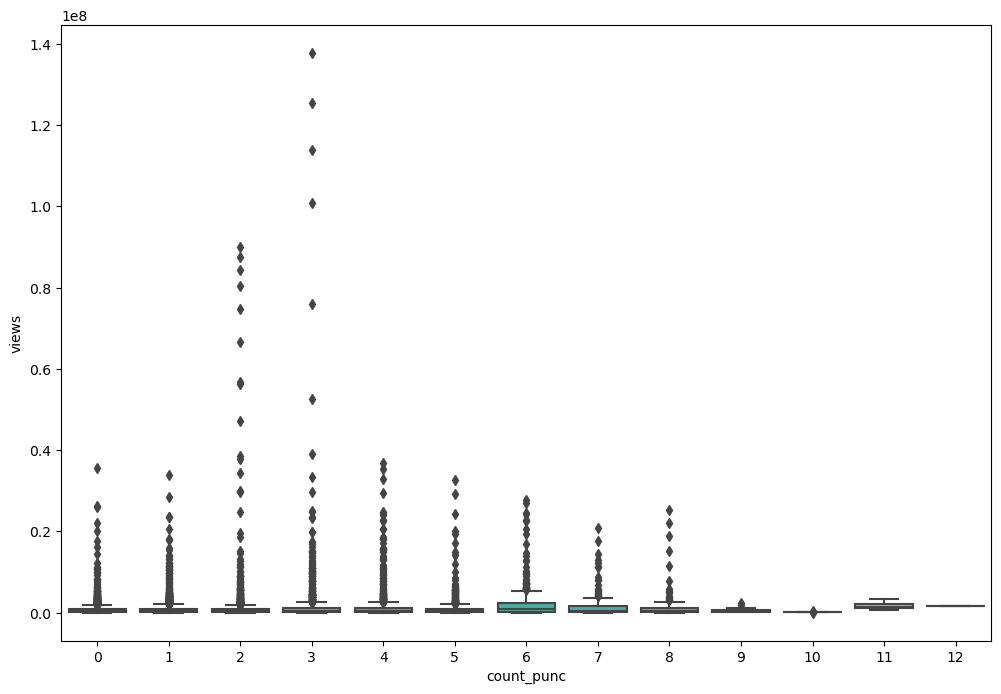

In [258]:
plt.figure(figsize=(12,8))
sns.boxplot(x='count_punc',y='views',data=sample)

In [259]:
sample['count_punc'].corr(sample['views'])

0.06510009783044846

In [ ]:
###conclusion - there is 0.07 % prob that if count of punctuation increases 
### then views will increase .